In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('dataset/data.csv',encoding='cp1252')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 1. How to find out total no. of records 

In [5]:
data.shape[0]

541909

## 2. How to find out total no. of columns?

In [7]:
data.shape[1]

8

## 3. Display all column names ?

In [9]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# 4. All Column Names Description:-
## InvoiceNo (invoice_num): A number assigned to each transaction
## StockCode (stock_code): Product code
## Description (description): Product name
## Quantity (quantity): Number of products purchased for each transaction
## InvoiceDate (invoice_date): Timestamp for each transaction
## UnitPrice (unit_price): Product price per unit
## CustomerID (cust_id): Unique identifier each customer
## Country (country): Country name

## 5. How to find out all missing values for each columns?

In [12]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 6. First Show all Quantity has negative values records?

In [14]:
data[data['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


## 7. Then find out total shape of Quantity has negative values records? [shape=10624]

In [16]:
data[data['Quantity']<0].shape[0]

10624

## 8. How to remove all Quantity records with negative values?

In [18]:
new_data=data[data['Quantity']>=0]

## 9. Then find out total records shape ? [df_new.shape is  541909-10624=531285]

In [20]:
new_data.shape[0]

531285

## 10. After UnitPrice column insert new column Amount_Spent & also formula assigned?

In [22]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [23]:
Amount_Spent=data['UnitPrice']*data['Quantity']

In [24]:
data.insert(6,"Amount_Spent",Amount_Spent)

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount_Spent,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom


## 11. InvoiceDate column converts string format into datetime format?

In [27]:
data['InvoiceDate']=pd.to_datetime(data.InvoiceDate)

In [28]:
data.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
Amount_Spent           float64
CustomerID             float64
Country                 object
dtype: object

## 12.  We add a few columns after InvoiceDate that consist of the Year, Month, Day and Hour for each transaction for analysis work.       

In [30]:
year=data.InvoiceDate.dt.year
month=data.InvoiceDate.dt.month
days=data.InvoiceDate.dt.day
hours=data.InvoiceDate.dt.hour

In [31]:
data.insert(5,'year',year)
data.insert(6,'month',month)
data.insert(7,'Days',days)
data.insert(8,'hours',hours)

In [32]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,year,month,Days,hours,UnitPrice,Amount_Spent,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010,12,1,8,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010,12,1,8,3.39,20.34,17850.0,United Kingdom


## 13. How to find out Top 5 customers with highest money spent records?Show Only 3 columns ['CustomerID','Country','Amount_Spent']     

In [34]:
data[['CustomerID','Country','Amount_Spent']].sort_values('Amount_Spent',ascending=False).head(5)

,CustomerID,Country,Amount_Spent
540421,16446.0,United Kingdom,168469.60
61619,12346.0,United Kingdom,77183.60
222680,15098.0,United Kingdom,38970.00
15017,NaN,United Kingdom,13541.33
299982,NaN,United Kingdom,11062.06


## 14. Plotting bar chart : How many orders (per month)?

In [36]:
data.groupby('month').CustomerID.sum()

month
1     3.319198e+08
2     3.117809e+08
3     4.223298e+08
4     3.541194e+08
5     4.400088e+08
6     4.264710e+08
7     4.209226e+08
8     4.219478e+08
9     6.229373e+08
10    7.727017e+08
11    1.007384e+09
12    6.869529e+08
Name: CustomerID, dtype: float64

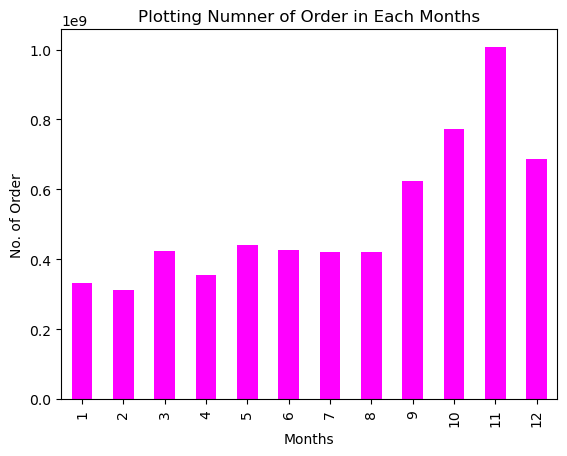

In [74]:
data.groupby('month').CustomerID.sum().plot(kind='bar',cmap='spring')
plt.title("Plotting Numner of Order in Each Months")
plt.xlabel("Months")
plt.ylabel("No. of Order")
plt.show()

## 15. Plotting bar chart : How many orders (per day)?

In [39]:
data.groupby('Days').CustomerID.sum()

Days
1     213738803.0
2     190673095.0
3     170226253.0
4     229890857.0
5     254039923.0
6     290746879.0
7     244524927.0
8     245849799.0
9     202477686.0
10    222599177.0
11    206373457.0
12    169962867.0
13    220735114.0
14    222771755.0
15    177744214.0
16    198470329.0
17    229292651.0
18    202525594.0
19    167863099.0
20    231507176.0
21    206374339.0
22    193557915.0
23    221906889.0
24    189403240.0
25    184394933.0
26    136726572.0
27    195319874.0
28    208919892.0
29    127199745.0
30    155351234.0
31    108307579.0
Name: CustomerID, dtype: float64

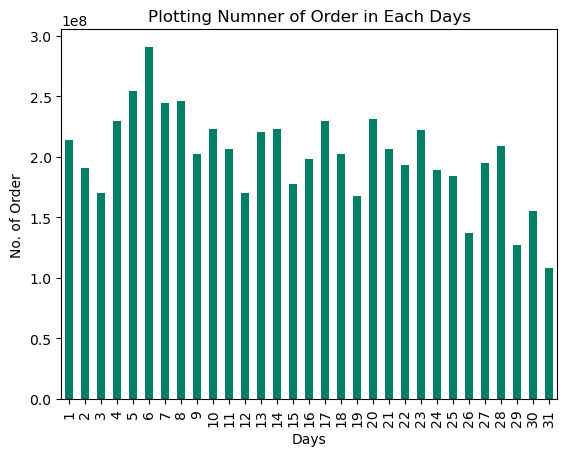

In [76]:
data.groupby('Days').CustomerID.sum().plot(kind='bar',cmap='summer')
plt.title("Plotting Numner of Order in Each Days")
plt.xlabel("Days")
plt.ylabel("No. of Order")
plt.show()

## 16. Plotting bar chart : How many orders (per hour)?

In [42]:
data.groupby('hours').CustomerID.sum()

hours
6     6.251860e+05
7     5.462635e+06
8     1.300868e+08
9     3.334411e+08
10    5.909521e+08
11    7.708067e+08
12    1.125370e+09
13    9.967588e+08
14    8.452458e+08
15    7.062412e+08
16    3.857212e+08
17    2.114454e+08
18    4.835338e+07
19    5.458825e+07
20    1.437736e+07
Name: CustomerID, dtype: float64

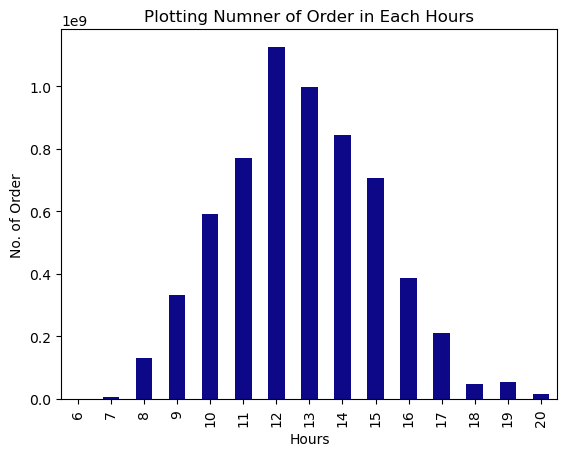

In [78]:
data.groupby('hours').CustomerID.sum().plot(kind='bar',cmap='plasma')
plt.title("Plotting Numner of Order in Each Hours")
plt.xlabel("Hours")
plt.ylabel("No. of Order")
plt.show()